In [1]:
#Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import requests
import gmaps
import os
import json
import time

#Import API Key
from api_keys import g_key

In [2]:
#the set the path
csv_path = "../Resources/country_vaccinations_clean.csv"

# Read our COVID data into pandas
covid_df = pd.read_csv(csv_path)
covid_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name
0,Algeria,DZA,1/29/2021,0,0,0,0,0,0,0,0,0,Sputnik V,Ministry of Health
1,Algeria,DZA,1/30/2021,30,0,0,30,30,0,0,0,1,Sputnik V,Ministry of Health
2,Andorra,AND,1/25/2021,576,576,0,0,0,0,0,0,0,Pfizer/BioNTech,Government of Andorra
3,Andorra,AND,1/26/2021,0,0,0,0,66,0,0,0,854,Pfizer/BioNTech,Government of Andorra
4,Andorra,AND,1/27/2021,0,0,0,0,66,0,0,0,854,Pfizer/BioNTech,Government of Andorra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463,Wales,0,2/2/2021,463657,462497,1160,22951,21530,14,14,0,6829,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom
2464,Wales,0,2/3/2021,491786,490570,1216,28129,22149,15,15,0,7025,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom
2465,Wales,0,2/4/2021,524677,523042,1635,32891,23101,16,16,0,7327,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom
2466,Wales,0,2/5/2021,559468,556997,2471,34791,25788,17,17,0,8179,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom


## Store Cleaned Data in DataFrame   

In [3]:
#Q1:  Total number of people fully vaccinated by country and ratios-daily  
#DF:  Country, Code, Date, People Fully Vaccinated, People Fully Vac/Hundred, add vaccine and source name
#Dict: Total number of people fully vaccinated - this is the number of people that received the entire set of immunization 
#according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;
#Total number of people fully vaccinated per hundred - ratio (in percent) between population fully immunized and total population up to the date in the country;
#Show covid_count() as part of understanding the data structure.  Show count and describe.
#Graph Type:  Bar Chart

#Check the number of countries 
country_count=covid_df["country"].value_counts()
country_count


England             56
Wales               56
United Kingdom      56
Scotland            56
Northern Ireland    56
                    ..
Algeria              2
Greenland            1
Guernsey             1
Liechtenstein        1
Saint Helena         1
Name: country, Length: 80, dtype: int64

In [4]:
#List the sum of "people_fully_vaccinated" grouped by country
country_sum=covid_df.groupby(["country"]).sum()["people_fully_vaccinated"]
country_sum

country
Algeria                        0
Andorra                        0
Argentina                1125006
Austria                   355860
Bahrain                        0
                          ...   
Turkey                         0
United Arab Emirates     6750000
United Kingdom          13133466
United States           99447760
Wales                      18877
Name: people_fully_vaccinated, Length: 80, dtype: int64

In [5]:
#Create new DF that only contains country and people_fully_vaccinated columns and removes 0 from people_fully_vaccinated
filtered_countries=covid_df[["country","people_fully_vaccinated"]].copy()
filtered_countries=filtered_countries[filtered_countries["people_fully_vaccinated"] !=0]

filtered_no_zero=filtered_countries.groupby(["country"]).sum()["people_fully_vaccinated"]
filtered_countries["country"].unique()


array(['Argentina', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Canada',
       'Cayman Islands', 'Chile', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czechia', 'Denmark', 'England', 'Estonia', 'Faeroe Islands',
       'Finland', 'France', 'Germany', 'Gibraltar', 'Greece', 'Guernsey',
       'Hungary', 'Iceland', 'Indonesia', 'Ireland', 'Isle of Man',
       'Israel', 'Italy', 'Jersey', 'Latvia', 'Lithuania', 'Luxembourg',
       'Malta', 'Mexico', 'Northern Ireland', 'Norway', 'Oman', 'Poland',
       'Portugal', 'Romania', 'Scotland', 'Seychelles', 'Singapore',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'United Arab Emirates',
       'United Kingdom', 'United States', 'Wales'], dtype=object)

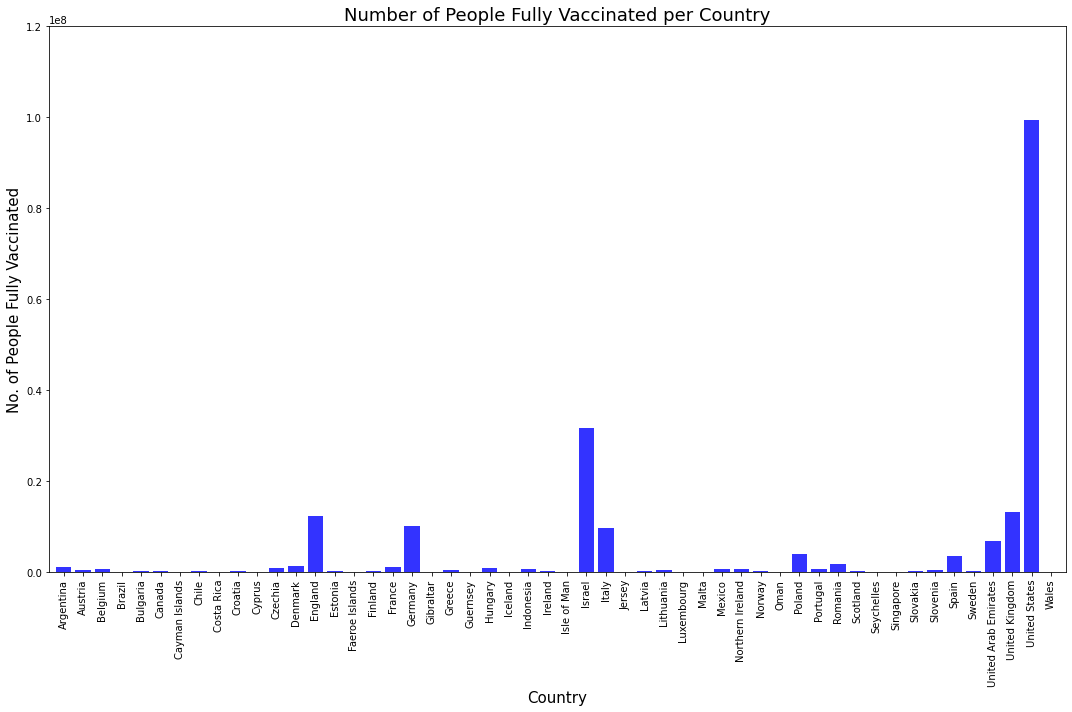

In [6]:
#Graph the results in a Bar Graph
x_axis=np.arange(len(filtered_no_zero))
fig1, ax1 = plt.subplots(figsize=(15,10))
plt.bar(x_axis, filtered_no_zero, color='b', alpha=0.8, align='center' )


#Set Data Frame column values as x-axis labels
tick_loc=[value for value in x_axis]

plt.xticks(tick_loc, ['Argentina', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Canada',
       'Cayman Islands', 'Chile', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czechia', 'Denmark', 'England', 'Estonia', 'Faeroe Islands',
       'Finland', 'France', 'Germany', 'Gibraltar', 'Greece', 'Guernsey',
       'Hungary', 'Iceland', 'Indonesia', 'Ireland', 'Isle of Man',
       'Israel', 'Italy', 'Jersey', 'Latvia', 'Lithuania', 'Luxembourg',
       'Malta', 'Mexico', 'Northern Ireland', 'Norway', 'Oman', 'Poland',
       'Portugal', 'Romania', 'Scotland', 'Seychelles', 'Singapore',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'United Arab Emirates',
       'United Kingdom', 'United States', 'Wales'], rotation='vertical')
plt.xlim(-0.75, len(x_axis)-0.25)

#plt.ylim(0, max(filtered_no_zero)+10)
plt.ylim(0,120000000)

plt.xlabel("Country", fontsize=15)
plt.ylabel("No. of People Fully Vaccinated", fontsize=15)
plt.title("Number of People Fully Vaccinated per Country", fontsize=18)
plt.tight_layout()

In [46]:
#Create new DF that only contains country and people_fully_vaccinated_per_hundred columns and removes 0 from people_fully_vaccinated_per_hundred
filtered_countries_hun=covid_df[["country","people_fully_vaccinated_per_hundred"]].copy()
filtered_countries_hun=filtered_countries_hun[filtered_countries_hun["people_fully_vaccinated_per_hundred"] !=0]

filtered_no_zero_hun=filtered_countries_hun.groupby(["country"])["people_fully_vaccinated_per_hundred"].max()
#filtered_countries_hun["country"].unique()
filtered_no_zero_hun
#sort_df=pd.DataFrame(sort_hun)
#sort_df["country"].unique()

country
Cayman Islands           4
Cyprus                   1
Denmark                  2
Estonia                  1
Faeroe Islands           1
Germany                  1
Gibraltar               16
Hungary                  1
Iceland                  1
Ireland                  1
Isle of Man              2
Israel                  24
Italy                    1
Jersey                   3
Lithuania                1
Malta                    1
Northern Ireland         1
Poland                   1
Portugal                 1
Romania                  1
Seychelles               1
Slovenia                 2
Spain                    1
United Arab Emirates     2
United States            2
Name: people_fully_vaccinated_per_hundred, dtype: int64

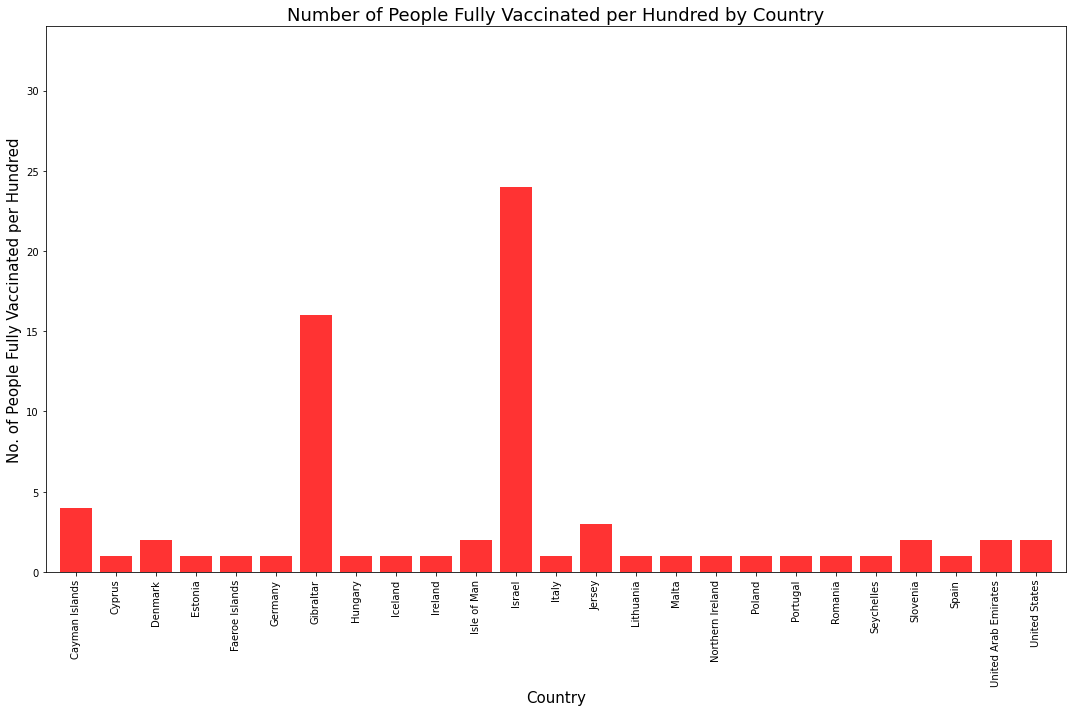

In [44]:
#Graph the results in a Bar Graph
x_axis=np.arange(len(filtered_no_zero_hun))
fig1, ax1 = plt.subplots(figsize=(15,10))
plt.bar(x_axis, filtered_no_zero_hun, color='r', alpha=0.8, align='center' )


#Set Data Frame column values as x-axis labels
tick_loc=[value for value in x_axis]

plt.xticks(tick_loc, ['Cayman Islands', 'Cyprus', 'Denmark', 'Estonia', 'Faeroe Islands',
       'Germany', 'Gibraltar', 'Hungary', 'Iceland', 'Ireland',
       'Isle of Man', 'Israel', 'Italy', 'Jersey', 'Lithuania', 'Malta',
       'Northern Ireland', 'Poland', 'Portugal', 'Romania', 'Seychelles',
       'Slovenia', 'Spain', 'United Arab Emirates', 'United States'], rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(filtered_no_zero_hun)+10)
#plt.ylim(0,120000000)

plt.xlabel("Country", fontsize=15)
plt.ylabel("No. of People Fully Vaccinated per Hundred", fontsize=15)
plt.title("Number of People Fully Vaccinated per Hundred by Country", fontsize=18)
plt.tight_layout()

In [59]:
#Q2: Which vaccines and mixes are being distributed most /least. 
#Create new DF that only contains country and people_fully_vaccinated columns and removes 0 from people_fully_vaccinated
filtered_countries_vac=covid_df[["country","people_fully_vaccinated","vaccines"]].copy()
filtered_countries_vac=filtered_countries_vac[filtered_countries_vac["people_fully_vaccinated"] !=0]

filtered_countries_vac["country"].unique()
filtered_countries_vac
#filtered_no_zero=filtered_countries_vac.groupby(["country"])["vaccines"].value_counts()
#filtered_no_zero
#vaccines_lst=filtered_countries_vac["vaccines"].unique()
#vaccines_lst

,country,people_fully_vaccinated,vaccines
32,Argentina,4394,Sputnik V
33,Argentina,16352,Sputnik V
34,Argentina,25146,Sputnik V
35,Argentina,29188,Sputnik V
36,Argentina,31987,Sputnik V
...,...,...,...
2463,Wales,1160,"Oxford/AstraZeneca, Pfizer/BioNTech"
2464,Wales,1216,"Oxford/AstraZeneca, Pfizer/BioNTech"
2465,Wales,1635,"Oxford/AstraZeneca, Pfizer/BioNTech"
2466,Wales,2471,"Oxford/AstraZeneca, Pfizer/BioNTech"


In [ ]:
#Graph the results in a Bar Graph
x_axis=np.arange(len(sort_hun))
fig1, ax1 = plt.subplots(figsize=(15,10))
plt.bar(x_axis, sort_hun, color='r', alpha=0.8, align='center' )


#Set Data Frame column values as x-axis labels
tick_loc=[value for value in x_axis]

plt.xticks(tick_loc, ['Algeria', 'Andorra', 'Argentina', 'Austria', 'Bahrain',
       'Bangladesh', 'Belgium', 'Bermuda', 'Bolivia', 'Brazil',
       'Bulgaria', 'Canada', 'Cayman Islands', 'Chile', 'China',
       'Costa Rica', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Ecuador',
       'Egypt', 'England', 'Estonia', 'Faeroe Islands', 'Finland',
       'France', 'Germany', 'Gibraltar', 'Greece', 'Greenland',
       'Guernsey', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland',
       'Isle of Man', 'Israel', 'Italy', 'Jersey', 'Kuwait', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Maldives', 'Malta',
       'Mexico', 'Monaco', 'Morocco', 'Myanmar', 'Nepal', 'Netherlands',
       'Northern Cyprus', 'Northern Ireland', 'Norway', 'Oman', 'Panama',
       'Poland', 'Portugal', 'Romania', 'Russia', 'Saint Helena',
       'Saudi Arabia', 'Scotland', 'Serbia', 'Seychelles', 'Singapore',
       'Slovakia', 'Slovenia', 'Spain', 'Sri Lanka', 'Sweden',
       'Switzerland', 'Turkey', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Wales'], rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(sort_hun)+10)
#plt.ylim(0,120000000)

plt.xlabel("Country", fontsize=15)
plt.ylabel("No. of People Fully Vaccinated per Hundred", fontsize=15)
plt.title("Number of People Fully Vaccinated per Hundred by Country", fontsize=18)
plt.tight_layout()

In [ ]:
#Q3:  Northern vs Southern Hemisphere-Identify global patterns or observations in regards to the vaccination types.
#DF
#Create Heat Map